# Latihan

## Read Data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
data_latihan = pd.read_excel('datalatihan.xlsx',sheet_name='NRP_4')

In [68]:
data_latihan.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,45,Local-gov,164427,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
1,38,Private,91039,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,60,United-States,>50K
2,40,Private,347934,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
3,46,Federal-gov,371373,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,35,Private,32220,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,60,United-States,<=50K


In [69]:
data = data_latihan.replace(' ?', np.nan)

In [71]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,45,Local-gov,164427,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
1,38,Private,91039,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,60,United-States,>50K
2,40,Private,347934,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
3,46,Federal-gov,371373,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,35,Private,32220,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,60,United-States,<=50K


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         281 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        281 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    295 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


## Missing Value

In [73]:
data.isnull().sum() #number of NA for each variable

age                0
workclass         19
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation        19
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     5
type               0
dtype: int64

In [74]:
data.isnull().sum().sum()

43

### Memisahkan kolom2

In [75]:
Y = ['type']
X_int = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']
X_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex','native-country']

In [76]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

### Melihat jumlah kelas

In [77]:
#show all distinct value of class
print(data_Y['type'].unique())

[' <=50K' ' >50K']


### Imputasi

In [79]:
## find missing data for each data type and fill it with mean and mode
data_int_array = []
data_float_array = []
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_int_1 = data_int[data_Y['type']==class_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)
    
    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [80]:
data_int_clean = pd.concat(data_int_array)
data_cat_clean = pd.concat(data_cat_array)

In [81]:
data_int_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 6 columns):
age               300 non-null float64
fnlwgt            300 non-null float64
education-num     300 non-null float64
capital-gain      300 non-null float64
capital-loss      300 non-null float64
hours-per-week    300 non-null float64
dtypes: float64(6)
memory usage: 16.4 KB


In [82]:
data_cat_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 8 columns):
workclass         300 non-null object
education         300 non-null object
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
native-country    300 non-null object
dtypes: object(8)
memory usage: 21.1+ KB


In [83]:
data_int_clean.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,45.0,164427.0,13.0,0.0,0.0,40.0
2,40.0,347934.0,9.0,0.0,0.0,35.0
3,46.0,371373.0,9.0,0.0,0.0,40.0
4,35.0,32220.0,12.0,0.0,0.0,60.0
5,34.0,187251.0,9.0,0.0,0.0,25.0


In [84]:
data_cat_clean.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Local-gov,Bachelors,Divorced,Prof-specialty,Unmarried,White,Female,United-States
2,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Female,United-States
3,Federal-gov,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Male,United-States
4,Private,Assoc-acdm,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
5,Private,HS-grad,Divorced,Prof-specialty,Unmarried,White,Female,United-States


### Encode Labels

In [85]:
from sklearn.preprocessing import LabelEncoder

In [87]:
# Encode untuk Sex, Steroid, Anaroxia, Spleen Pabable, Spiders tanpa membuat kolom baru
data_cat_clean['workclass'] = LabelEncoder().fit_transform(data_cat_clean['workclass'])
data_cat_clean['education'] = LabelEncoder().fit_transform(data_cat_clean['education'])
data_cat_clean['marital-status'] = LabelEncoder().fit_transform(data_cat_clean['marital-status'])
data_cat_clean['occupation'] = LabelEncoder().fit_transform(data_cat_clean['occupation'])
data_cat_clean['relationship'] = LabelEncoder().fit_transform(data_cat_clean['relationship'])
data_cat_clean['race'] = LabelEncoder().fit_transform(data_cat_clean['race'])
data_cat_clean['sex'] = LabelEncoder().fit_transform(data_cat_clean['sex'])
data_cat_clean['native-country'] = LabelEncoder().fit_transform(data_cat_clean['native-country'])
data_cat_clean.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,1,9,0,8,4,4,0,16
2,2,11,3,6,1,4,0,16
3,0,11,0,0,1,4,1,16
4,2,7,3,2,1,4,0,16
5,2,11,0,8,4,4,0,16


In [88]:
#statistika deskriptif
data_int_clean.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000
mean,37.526667,189360.246667,10.133333,970.626667,70.89000,39.706667
std,13.095582,101278.519245,2.438999,6362.846783,359.82752,12.399453
min,17.000000,22463.000000,2.000000,0.000000,0.00000,4.000000
25%,27.000000,111550.750000,9.000000,0.000000,0.00000,38.000000
50%,36.000000,177536.000000,10.000000,0.000000,0.00000,40.000000
75%,45.000000,242939.750000,12.250000,0.000000,0.00000,45.000000
max,74.000000,680390.000000,16.000000,99999.000000,2415.00000,80.000000


In [89]:
#statistika deskriptif
data_cat_clean.describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0000,300.000000
mean,2.213333,9.933333,1.926667,5.470000,1.656667,3.700000,0.6600,15.420000
std,0.866212,3.712343,1.376325,3.752694,1.655675,0.803421,0.4745,2.316929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,2.000000,9.000000,1.000000,2.000000,0.000000,4.000000,0.0000,16.000000
50%,2.000000,11.000000,1.000000,6.000000,1.000000,4.000000,1.0000,16.000000
75%,2.000000,12.000000,3.000000,8.000000,3.000000,4.000000,1.0000,16.000000
max,5.000000,14.000000,5.000000,12.000000,5.000000,4.000000,1.0000,16.000000


## Standardize

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
data_int_clean['age'] = StandardScaler().fit(data_int_clean[['age']]).transform(data_int_clean[['age']])
data_int_clean['fnlwgt'] = StandardScaler().fit(data_int_clean[['fnlwgt']]).transform(data_int_clean[['fnlwgt']])
data_int_clean['education-num'] = StandardScaler().fit(data_int_clean[['education-num']]).transform(data_int_clean[['education-num']])
data_int_clean['capital-gain'] = StandardScaler().fit(data_int_clean[['capital-gain']]).transform(data_int_clean[['capital-gain']])
data_int_clean['capital-loss'] = StandardScaler().fit(data_int_clean[['capital-loss']]).transform(data_int_clean[['capital-loss']])
data_int_clean['hours-per-week'] = StandardScaler().fit(data_int_clean[['hours-per-week']]).transform(data_int_clean[['hours-per-week']])


In [49]:
data_int_clean

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.571629,-0.246596,1.177309,-0.152801,-0.197340,0.023696
2,0.189183,1.568336,-0.465448,-0.152801,-0.197340,-0.380221
3,0.648119,1.800153,-0.465448,-0.152801,-0.197340,0.023696
4,-0.193263,-1.554158,0.766620,-0.152801,-0.197340,1.639366
5,-0.269752,-0.020861,-0.465448,-0.152801,-0.197340,-1.188056
6,-0.346241,-0.111298,1.177309,-0.152801,-0.197340,-1.591973
7,0.265673,1.520734,-0.465448,-0.152801,-0.197340,-0.299437
8,-1.340601,0.725834,-0.054759,-0.152801,-0.197340,0.023696
9,-1.111133,2.114011,-2.929583,-0.152801,-0.197340,0.023696
10,-0.881666,-1.236948,-0.054759,-0.152801,-0.197340,-0.380221


## Deteksi Outlier

In [92]:
### for detect outlier
data_num_w_type = pd.concat([data_int_clean, data_Y], axis=1)

In [93]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

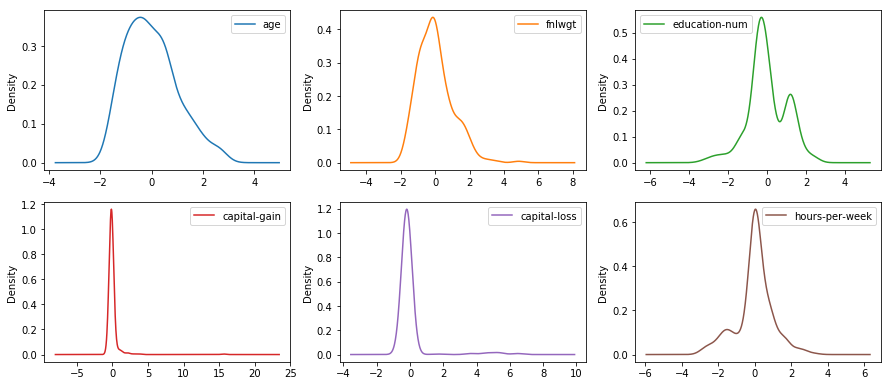

In [94]:
# Univariate Density Plots
data_num_w_type.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

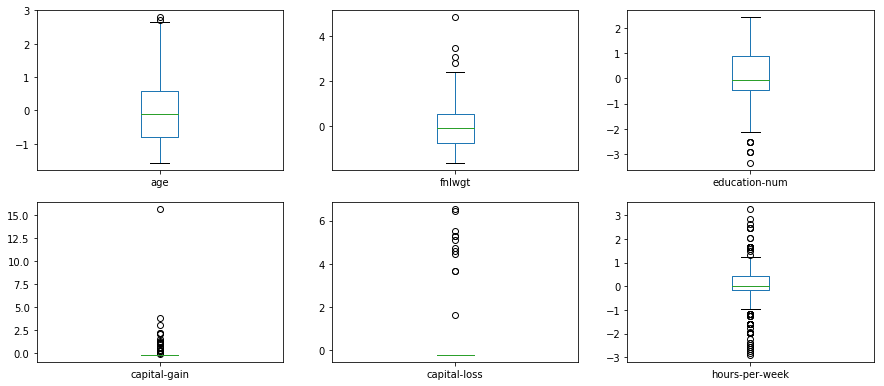

In [95]:
data_num_w_type.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [102]:
colors_palette = {" >50K": "red",  " <=50K": "blue"}
colors = [colors_palette[c] for c in data_num_w_type['type']]   

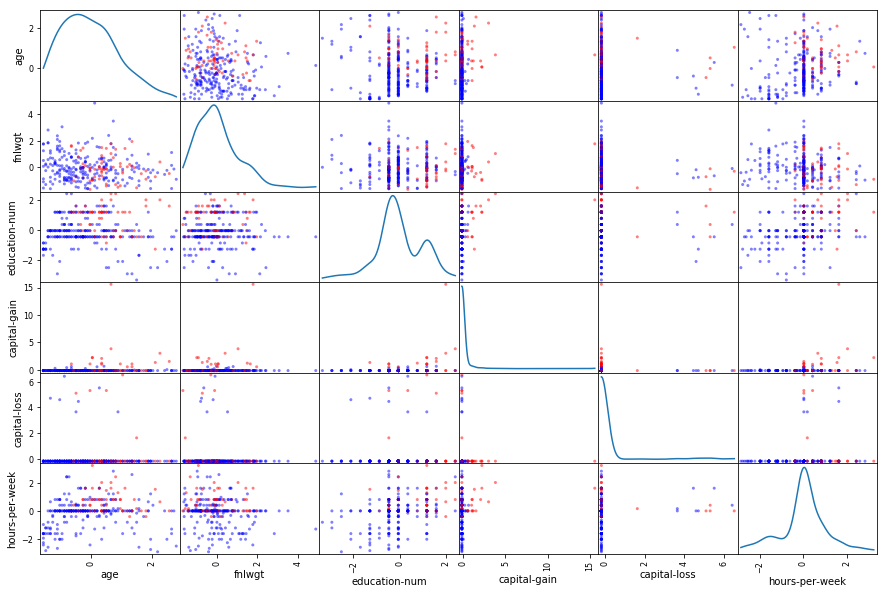

In [103]:
## red : >50K
## blue: <=50K
from pandas.plotting import scatter_matrix
scatter_matrix(data_num_w_class, color=colors, diagonal='kde')
plt.show()

In [116]:
RezaAgniPradita_06211640000074 = pd.concat([data_num_w_type, data_cat_clean], axis=1)

In [117]:
RezaAgniPradita_06211640000074.to_csv('RezaAgniPradita_06211640000074.csv', index=0)